# Analysis of  Zomato Bangalore Restaurant dataset



Loading the dataset: Load the data and import the libraries.

Data Cleaning:
Deleting redundant columns.

Renaming the columns.

Dropping duplicates.

Cleaning individual columns.

Remove the NaN values from the dataset

Some Transformations

Data Visualization 


In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
#importing the datase

df=pd.read_csv(r"C:\Users\shri\Downloads\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
del df["url"]
del df["address"]
del df["phone"]

In [7]:
# Duplicates values
df.duplicated().sum()

63

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#checking the NaN values
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7760
votes                              0
location                          21
rest_type                        227
dish_liked                     28027
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<AxesSubplot:>

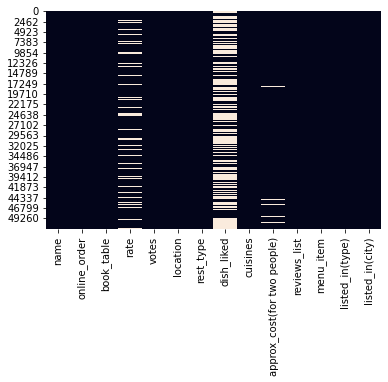

In [10]:
sns.heatmap(df.isnull(), cbar=False)

In [11]:
del df["dish_liked"]

In [12]:
df.dropna(how='any',inplace=True)
 

In [13]:
#checking the NaN values
df.isnull().sum()


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

<AxesSubplot:>

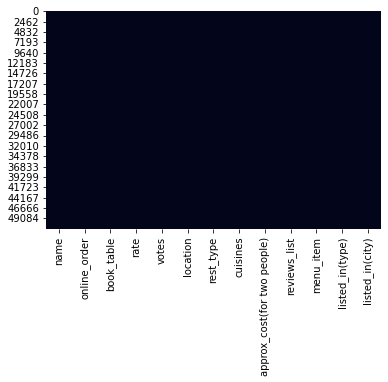

In [14]:
sns.heatmap(df.isnull(), cbar=False)

In [15]:
#Reading Column Names
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [16]:
#Changing the column names
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

In [17]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [18]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [19]:
#df['cost'] = df['cost'].astype(float)

In [20]:
#Some Transformations
df['cost'] = df['cost'].astype(str) #Changing the cost to string
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float) # Changing the cost to Float
df.info() # looking at the dataset information after transformation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43486 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43486 non-null  object 
 1   online_order  43486 non-null  object 
 2   book_table    43486 non-null  object 
 3   rate          43486 non-null  object 
 4   votes         43486 non-null  int64  
 5   location      43486 non-null  object 
 6   rest_type     43486 non-null  object 
 7   cuisines      43486 non-null  object 
 8   cost          43486 non-null  float64
 9   reviews_list  43486 non-null  object 
 10  menu_item     43486 non-null  object 
 11  type          43486 non-null  object 
 12  city          43486 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 4.6+ MB


In [21]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [22]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
#Removing '/5' from Rates
df = df.loc[df.rate !='NEW'] #Removed rows which were having "new"
df = df.loc[df.rate !='-'].reset_index(drop=True) #Removed rows which were having "-"
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x #Function 
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')#apply function to col
df['rate'].head() # looking at the dataset after transformation

C:\Users\shri\AppData\Local\Temp/ipykernel_13920/3537251370.py:4: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41226 entries, 0 to 41225
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41226 non-null  object 
 1   online_order  41226 non-null  object 
 2   book_table    41226 non-null  object 
 3   rate          41226 non-null  float64
 4   votes         41226 non-null  int64  
 5   location      41226 non-null  object 
 6   rest_type     41226 non-null  object 
 7   cuisines      41226 non-null  object 
 8   cost          41226 non-null  float64
 9   reviews_list  41226 non-null  object 
 10  menu_item     41226 non-null  object 
 11  type          41226 non-null  object 
 12  city          41226 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 4.1+ MB


<AxesSubplot:ylabel='online_order'>

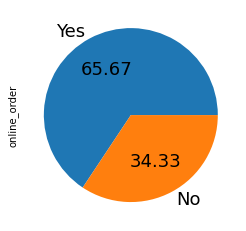

In [25]:
df.online_order.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

<AxesSubplot:ylabel='book_table'>

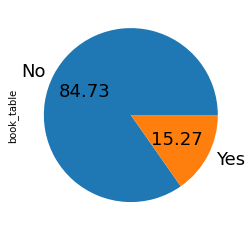

In [26]:
df.book_table.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

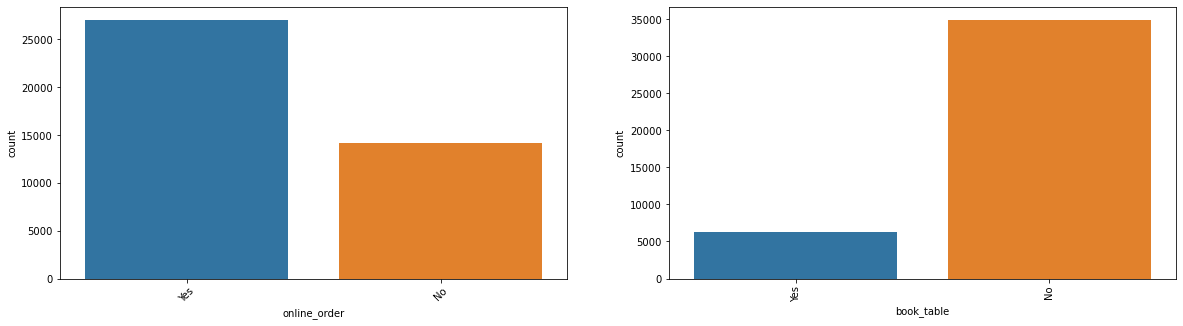

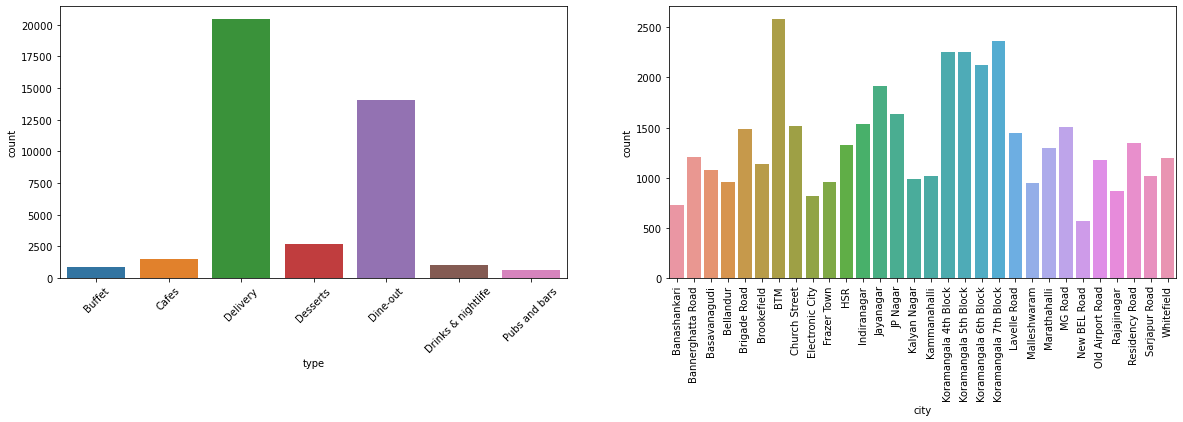

In [27]:
cat_cols = ['online_order','book_table','type','city']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=90)
    i += 1
    
    plt.show()

# Largest Food Chain in Bangalore 

In [28]:
df.name.value_counts().head(30).iplot(kind="bar")

# Most Popular Restaurant types 

In [29]:
df.rest_type.value_counts().head(30).iplot(kind="bar")

In [30]:
df.describe()

,rate,votes,cost
count,41226.000000,41226.000000,41226.000000
mean,3.702091,352.863217,603.961238
std,0.440063,884.509575,464.985064
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.500000,500.000000
75%,4.000000,278.000000,750.000000
max,4.900000,16832.000000,6000.000000


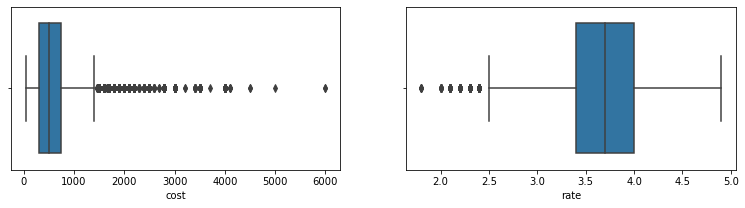

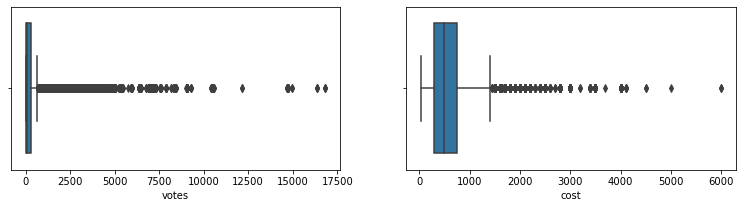

In [31]:
num_cols = ['cost','rate','votes','cost']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

# Expensive Restaurants in Bangalore

In [32]:
df[df.cost>3000].sort_values(ascending=False,by="cost")

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
15114,Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,Old Airport Road,Fine Dining,"French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
36363,Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,Old Airport Road,Fine Dining,"French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road
32048,Royal Afghan - ITC Windsor,No,Yes,4.3,413,Sankey Road,Fine Dining,"North Indian, Mughlai",5000.0,"[('Rated 5.0', 'RATED\n It is just Bukhara wi...",[],Dine-out,Malleshwaram
33105,Malties - Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Dine-out,Marathahalli
33520,Malties - Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Drinks & nightlife,Marathahalli
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33562,The Market - The Ritz-Carlton,No,Yes,4.3,620,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 3.0', 'RATED\n Went there for buffet...",[],Buffet,MG Road
31079,b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,No,Yes,4.3,429,Vasanth Nagar,"Fine Dining, Bar","North Indian, Italian, Chinese, Japanese",3400.0,"[('Rated 2.0', ""RATED\n I was here last Sunda...",[],Dine-out,Lavelle Road
3985,The Market - The Ritz-Carlton,No,Yes,4.3,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 4.0', 'RATED\n Had breakfast at the ...",[],Buffet,Brigade Road
10421,Blue Ginger - The Taj West End,No,Yes,4.4,514,Race Course Road,Fine Dining,Vietnamese,3200.0,"[('Rated 5.0', 'RATED\n Such an elegant place...",[],Dine-out,Church Street


Expensive Restaurants Don't take online orders but table booking is Available.

Majority of Expensive Restaurants are having ratings above 4.

# Where are most of the expensive Restaurants are located ?

In [34]:
df[df.cost>3000].sort_values(ascending=False,by="cost").location.value_counts().iplot(kind="bar")

 Majority of Expensive Restaurants are located in Residency Road

In [35]:

df[df.cost>3000].rest_type.value_counts().iplot(kind="bar")

 Majority of Expensive Restaurants are Fine Dining.

# Ratings by Type of Restaurants

In [36]:
rate_type=pd.crosstab(df['rate'],df['type'])
rate_type

type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
rate,,,,,,,
1.8,0,0,0,0,5,0,0
2.0,0,0,1,0,6,4,0
2.1,0,0,16,0,8,0,0
2.2,0,0,11,0,15,0,0
2.3,5,1,22,0,23,0,0
2.4,0,2,31,1,28,2,2
2.5,1,2,53,1,41,1,1
2.6,3,10,142,5,83,5,1
2.7,4,9,136,9,136,6,3


In [37]:
rate_type.iplot(kind="bar",barmode="stack")

# Restaurants per location

In [39]:
df["location"].value_counts().head(20).iplot(kind="bar")

# Best Economical Restaurants 

In [40]:
df[(df["cost"]<=100) & (df["rate"]>=4)].sort_values(by=["rate"],ascending=False)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
2666,Brahmin's Coffee Bar,No,No,4.8,2679,Basavanagudi,Quick Bites,South Indian,100.0,"[('Rated 5.0', ""RATED\n Very soft idly, soft ...",[],Dine-out,Basavanagudi
547,Taaza Thindi,No,No,4.7,651,Banashankari,Quick Bites,South Indian,100.0,"[('Rated 5.0', 'RATED\n One of the cleanest s...",[],Dine-out,Banashankari
16959,Sri Laxmi Venkateshwara Coffee Bar,No,No,4.4,344,Banashankari,Quick Bites,South Indian,100.0,"[('Rated 4.0', ""RATED\n For Early morning bre...",[],Dine-out,Jayanagar
556,Sri Laxmi Venkateshwara Coffee Bar,No,No,4.4,343,Banashankari,Quick Bites,South Indian,100.0,"[('Rated 4.0', ""RATED\n For Early morning bre...",[],Dine-out,Banashankari
2851,Sri Laxmi Venkateshwara Coffee Bar,No,No,4.4,343,Banashankari,Quick Bites,South Indian,100.0,"[('Rated 4.0', ""RATED\n For Early morning bre...",[],Dine-out,Basavanagudi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23371,Hari Super Sandwich,Yes,No,4.0,18,BTM,Quick Bites,"Sandwich, Fast Food",100.0,"[('Rated 3.0', 'RATED\n A different way of se...","['Veg Pizza [6 inches]', 'Paneer Pizza [6 inch...",Delivery,Koramangala 5th Block
21114,Hari Super Sandwich,Yes,No,4.0,16,BTM,Quick Bites,"Sandwich, Fast Food",100.0,"[('Rated 3.0', 'RATED\n A different way of se...","['Veg Pizza [6 inches]', 'Capsicum Pizza [6 in...",Delivery,Koramangala 4th Block
21018,Shiv Shakthi,Yes,No,4.0,176,HSR,Quick Bites,"Street Food, North Indian",100.0,"[('Rated 4.0', 'RATED\n After along time ..th...","['Jalebi [100 grams]', 'Samosa [1 Piece]', 'Da...",Delivery,Koramangala 4th Block
2023,SL Vadapav,Yes,No,4.0,78,Jayanagar,Quick Bites,Maharashtrian,100.0,"[('Rated 4.0', 'RATED\n Zomato home delivery ...",[],Delivery,Basavanagudi


# Where are most of the best cheapest  Restaurants are located ?

In [41]:
df[(df["cost"]<=100) & (df["rate"]>=4)].sort_values(by=["rate"],ascending=False).location.value_counts().iplot(kind="bar")

Best Cheap Restaurants are located at Basavangudi,jayanagar,malleshwaram & HSR

In [42]:
df["cost"].mean()

603.9612380536555

# Best Average cost Restaurants

In [43]:
df[(df["cost"]<=df["cost"].mean()) & (df["rate"]>=4) ].sort_values(by=["rate"],ascending=False)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
38305,Belgian Waffle Factory,Yes,No,4.9,1749,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n Looks like there's a ...",[],Desserts,Residency Road
8183,Belgian Waffle Factory,Yes,No,4.9,201,Koramangala 5th Block,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n FYI, I have no photos...",[],Desserts,BTM
4658,Belgian Waffle Factory,Yes,No,4.9,1746,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Desserts,Brigade Road
34279,Belgian Waffle Factory,Yes,No,4.9,1750,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 4.0', ""RATED\n Looks like there's a ...","['The Red Wonder Waffle [Bubble]', 'Bubble Kit...",Desserts,MG Road
11634,Belgian Waffle Factory,Yes,No,4.9,1743,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Delivery,Frazer Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27673,Punjabi Nawabi,Yes,No,4.0,109,Koramangala 1st Block,Casual Dining,North Indian,500.0,"[('Rated 5.0', 'RATED\n Best option for North...","['Ambarsari Kulcha Combo', 'Chur Chur Naan Com...",Delivery,Koramangala 7th Block
13309,Warm Oven,Yes,No,4.0,153,HSR,Bakery,"Bakery, Desserts",500.0,"[('Rated 3.0', ""RATED\n 3/5 only because of d...",[],Desserts,HSR
27670,Faasos,Yes,No,4.0,461,Koramangala 8th Block,Quick Bites,"North Indian, Biryani, Fast Food",500.0,"[('Rated 4.0', 'RATED\n Ordered food for deli...","['Chicken Biryani', 'Paneer Biryani', 'Barbequ...",Delivery,Koramangala 7th Block
13310,Mumbai Kulfi,Yes,No,4.0,92,HSR,Dessert Parlor,Ice Cream,100.0,"[('Rated 4.0', 'RATED\n went here on sunday e...",[],Desserts,HSR


# Popular cuisines in Bangalore 

In [44]:
df.cuisines.value_counts().sort_values(ascending = False).head(10).iplot(kind="bar")

 North indian ,Chinese & South indian are some of the popular cuisines in Bangalore

# Average Cost by Location

In [45]:
resbyloc=df.groupby("location")

In [46]:
resbyloc.mean().sort_values(by="cost").iplot(kind="bar",barmode="stack")

# Finding best Restaurants by Cost & Location

In [47]:
print(" Cost for 2 :")
res_cost=float(input(""))
print("Location : ")
res_loc=input("")
def top_rest(res_cost,res_loc):
    x=df[(df["cost"]<=res_cost) & (df["rate"]>=4) & (df["location"]==res_loc) ].sort_values(by=["rate"],ascending=False)
    return x
top_rest(res_cost,res_loc)


 Cost for 2 :
600
Location : 
BTM


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
21009,eat.fit,Yes,No,4.6,1189,BTM,Delivery,"Healthy Food, North Indian, Biryani, Continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...","['Chicken Chettinad & Lachha Paranthas Meal', ...",Delivery,Koramangala 4th Block
23200,eat.fit,Yes,No,4.6,1193,BTM,Delivery,"Healthy Food, North Indian, Biryani, Continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...","['Chicken Keema Parantha Wrap', 'Lucknowi Chic...",Delivery,Koramangala 5th Block
777,eat.fit,Yes,No,4.5,1178,BTM,Delivery,"Healthy Food, North Indian, Biryani, Continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...",[],Delivery,Bannerghatta Road
25501,eat.fit,Yes,No,4.5,1193,BTM,Delivery,"Healthy Food, North Indian, Biryani, Continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...","['Chicken Keema Parantha Wrap', 'Lucknowi Chic...",Delivery,Koramangala 6th Block
17307,eat.fit,Yes,No,4.5,1185,BTM,Delivery,"Healthy Food, North Indian, Biryani, Continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...","['Fruit Pop Oatmeal Bowl', 'Banana Walnut Cake...",Delivery,JP Nagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17469,Gorbandh,Yes,No,4.0,85,BTM,Quick Bites,"Fast Food, North Indian",400.0,"[('Rated 4.0', ""RATED\n Have ordered from thi...","['Paneer Paratha', 'Sattu Paratha', 'Aloo Para...",Delivery,JP Nagar
17513,Waffle Head,Yes,No,4.0,36,BTM,"Dessert Parlor, Beverage Shop","Desserts, Beverages, Bakery, Ice Cream",300.0,"[('Rated 5.0', ""RATED\n Visited today.\nIt's ...",[],Delivery,JP Nagar
17621,Rock Stone Ice Cream Factory,Yes,No,4.0,130,BTM,Dessert Parlor,Ice Cream,230.0,"[('Rated 4.0', ""RATED\n Ice creams are really...","['Butterscotch Melody Cake', 'Rock With Ferrer...",Delivery,JP Nagar
17626,Bun Town,Yes,No,4.0,204,BTM,"Cafe, Bakery","Cafe, Bakery",500.0,"[('Rated 4.0', 'RATED\n Very nice decorative ...","['Red Velvet Muffin', 'Ginger Karak Tea', 'Chi...",Delivery,JP Nagar
